# **1️⃣ Understanding Vector Databases**
* A vector database stores and retrieves high-dimensional vector embeddings, which are numerical representations of data (text, images, audio, video).
Instead of exact keyword matches (as in traditional databases), vector databases find similar data points using techniques like:

  * Cosine similarity
  * Euclidean distance
  * Dot product

**🔹 Why Use Vector Databases?**

✅ Fast similarity search (even with millions of records)

✅ Scalable storage & retrieval

✅ Hybrid search (combining vector + keyword search)

✅ Efficient for unstructured data (text, images, videos, etc.)

# **2️⃣ Overview of AstraDB, FAISS, and Pinecone**

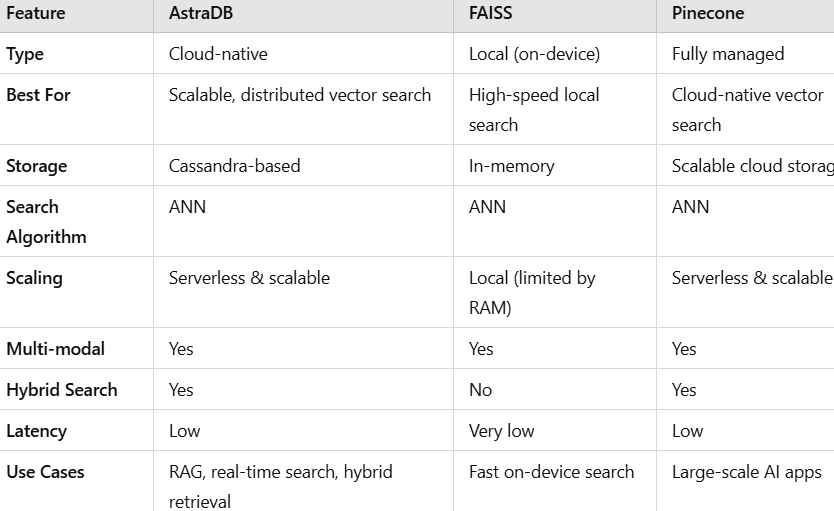

# **3️⃣ FAISS: High-Speed Local Vector Search**
* FAISS (Facebook AI Similarity Search) is an open-source vector database optimized for fast on-device search. It is ideal for high-performance similarity search on local machines.

**🔹 Key Features**

✅ Fast Approximate Nearest Neighbor (ANN) search

✅ Optimized for large-scale vector search

✅ Supports CPU and GPU acceleration

✅ Best for on-device search (limited by RAM)

**🔹 Example: Using FAISS with LangChain**

In [2]:
!pip install langchain-community faiss-cpu tiktoken

  Using cached langchain_community-0.3.16-py3-none-any.whl.metadata (2.9 kB)
  Using cached faiss_cpu-1.9.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.31
    Uninstalling langchain-core-0.3.31:
      Successfully uninstalled langchain-core-0.3.31
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled lang

In [3]:
import openai
from google.colab import userdata
import os


openai_api= userdata.get("OPENAI_API_KEY")
pinecone_api=userdata.get("pinecone_api")

In [4]:
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.schema import Document

# Initialize embedding model
embedding_model = OpenAIEmbeddings(model="text-embedding-3-small",openai_api_key=openai_api)

# Sample documents
docs = [
    Document(page_content="FAISS is an efficient vector search library."),
    Document(page_content="Vector databases improve AI search."),
]

# Create FAISS vector store
vector_store = FAISS.from_documents(docs, embedding_model)

# Perform similarity search
query = "What is a vector database?"
retrieved_docs = vector_store.similarity_search(query, k=2)

for doc in retrieved_docs:
    print(doc.page_content)


<ipython-input-4-5d7a08016a25>:6: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding_model = OpenAIEmbeddings(model="text-embedding-3-small",openai_api_key=openai_api)


Vector databases improve AI search.
FAISS is an efficient vector search library.


# **4️⃣Pinecone: Cloud-Native Vector Database**
Pinecone is a fully managed vector database designed for large-scale applications. It excels at real-time search, personalization, and recommendation systems.

**🔹 Key Features**
✅ Cloud-native & scalable

✅ Hybrid search (vector + metadata filtering)

✅ Supports billions of vectors

✅ Used for RAG in LLM applications


**🔹 Example: Using Pinecone with LangChain**

In [6]:
!pip install Pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 7.2 MB/s eta 0:00:00


In [14]:
# # Install required packages
# !pip install langchain-core langchain-community langchain-openai pinecone-client

# import os
# from pinecone import Pinecone,ServerlessSpec
# from langchain_community.vectorstores import Pinecone as PineconeVectorStore
# from langchain_openai import OpenAIEmbeddings
# from langchain_core.prompts import ChatPromptTemplate
# from langchain_core.output_parsers import StrOutputParser
# from langchain_core.runnables import RunnablePassthrough
# from langchain_openai import ChatOpenAI


# pinecone_api_key = pinecone_api

# # Initialize Pinecone
# pc = Pinecone(api_key=pinecone_api_key.strip())  # Strip any extra whitespace or newlines

# # Create or connect to an index
# index_name = "vector-db-demo"

#  #Check if the index exists, otherwise create it
# if index_name not in pc.list_indexes().names():
#     pc.create_index(
#         name=index_name,
#         dimension=1536,  # OpenAI embeddings dimension
#         spec=ServerlessSpec(
#             cloud="aws",  # or "gcp"
#             region="us-west-2"  # Choose a region supported by Pinecone
#         )
#     )

# # Connect to the index
# index = pc.Index(index_name)

# # Initialize OpenAI embeddings
# embeddings = OpenAIEmbeddings(model="text-embedding-3-small",openai_api_key=openai_api)

# # Initialize Pinecone vector store
# vector_store = PineconeVectorStore(index, embeddings, "text")

# # Add documents to the vector store
# vector_store.add_texts(["Pinecone is a scalable vector database."])

# # Perform similarity search
# query = "What is Pinecone?"
# results = vector_store.similarity_search(query, k=2)

# print("Search Results:")
# for result in results:
#     print(result.page_content)

# # Optional: Create a RAG chain
# prompt = ChatPromptTemplate.from_template(
#     """Answer using only this context:
#     {context}

#     Question: {question}
#     Answer:"""
# )

# llm = ChatOpenAI(model="gpt-3.5-turbo")
# retriever = vector_store.as_retriever(search_kwargs={"k": 2})

# rag_chain = (
#     {"context": retriever, "question": RunnablePassthrough()}
#     | prompt
#     | llm
#     | StrOutputParser()
# )

# # Ask a question
# question = "What is Pinecone?"
# print("\nRAG Answer:")
# print(rag_chain.invoke(question))

# **Real-World Applications of Vector Databases**
🔹 1. Retrieval-Augmented Generation (RAG)

* Enhances LLMs by retrieving external knowledge before generating responses.
* Used in chatbots, customer support, AI assistants.

🔹 2. AI-Powered Search Engines

* Semantic search in Google, Bing, and AI-powered search tools.
* Finds relevant documents based on meaning (not just keywords).

🔹 3. Personalized Recommendations

* E-commerce, Netflix, Spotify, news feeds.
* Matches user preferences to recommended products, movies, or articles.

🔹 4. Multimodal AI
* Cross-modal searches (e.g., searching for an image using text descriptions).
* Used in medical AI, security, and content retrieval.